# Machine Learning Engineer Nanodegree
## Deep Q-Network: Reinforcement Learning with TensorFlow&OpenAI Gym

----
## 1. Basic Environment

We can simulate this game using [OpenAI Gym](https://gym.openai.com/). First, let's check out how OpenAI Gym works. Then, we'll get into training an agent to play the FrozenLake game. 

FrozenLake is that a agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

In [1]:
import gym #Import 'OpenAIGym'

env = gym.make("FrozenLake-v0") #Make basic environment
observation = env.reset() #Initialize the agent

[2017-08-06 22:27:25,865] Making new env: FrozenLake-v0


We interact with the simulation through `env`. To show the simulation running, you can use `env.render()` to render one frame. Passing in an action as an integer to `env.step` will generate the next step in the simulation.  You can see how many actions are possible from `env.action_space` and to get a random action you can use `env.action_space.sample()`. In the FrozenLake game, there are 4 possible actions, moving the agent up, down, left or right. And there are two rewards we can take, encoded as 0 and 1.

* env.render() : display envoronment
* env.action_space.sample() : the agent action
* env.step() : execute step and get infomations

![frozen_lake_agent](images/frozen_lake_agent.png)

In [3]:
env.render() #Display environment
action = env.action_space.sample() #The agent action.
observation, reward, done, info = env.step(action) #Execute step and get infomations


SFFF
FHFH
FFFH
HFFG


There is 4x4 grid environment.      
    SFFF       (S: starting point, safe)    
    FHFH       (F: frozen surface, safe)    
    FFFH       (H: hole, fall to your doom)    
    HFFG       (G: goal, where the frisbee is located)    
    
There is the FrozenLake map that we made. 

![frozen_lake_1](images/frozen_lake_1.png)

In this game, the episode ends when you reach the goal or fall in a hole. The agent receive a reward of 1 if it reach the goal, and zero otherwise. So, our final goal is that we get a reward of 1.

----
## 2. Basic Q-table

But, We are stucked. Because we don't know where is holes. There is the real FrozenLake map for our agent.

![frozen_lake_2](images/frozen_lake_2.png)

We can train the agent by random actions. But, as you know, it isn't efficient. So, we need other solution. The solution is that:  
> Even if you know the way, **ask** one more time. - Korean proverbs

Before we action, the agent should ask to someone. This is [Q-learning](https://en.wikipedia.org/wiki/Q-learning). Q-learning is a model-free reinforcement learning technique. Specifically, Q-learning can be used to find an optimal action-selection policy for any given (finite) Markov decision process (MDP). It works by learning an action-value function that ultimately gives the expected utility of taking a given action in a given state and following the optimal policy thereafter. A policy is a rule that the agent follows in selecting actions, given the state it is in. When such an action-value function is learned, the optimal policy can be constructed by simply selecting the action with the highest value in each state. One of the strengths of Q-learning is that it is able to compare the expected utility of the available actions without requiring a model of the environment. Additionally, Q-learning can handle problems with stochastic transitions and rewards, without requiring any adaptations. It has been proven that for any finite MDP, Q-learning eventually finds an optimal policy, in the sense that the expected value of the total reward return over all successive steps, starting from the current state, is the maximum achievable. 

There is a simple Q-learning function. If we give the state and action as parameters, the function will return optimized value. 

![q_table](images/q_table.png)

Here is an example. Suppose the agent is on the 's1'.

| Q-function: Q(state, action) 	| reward 	|
|:-------:	|:------:	|
|   Q(s1, Up)  	|  0   |
|   Q(s1, Down)   	|  0.3  |
|   Q(s1, Left)   	| 0  |
|   Q(s1, Right)   	|  0.5  |

This table shows reward according to each actions on the 's1'. We can choose a action that gives the greatest reward. In this case, it is 'Right'. So, here is a equation:

$$
\pi^{*}{(s)} = {\operatorname{argmax}}{Q(s, a)}
$$

where $s$ is a state, $a$ is an action, and $\pi$ is a policy, $^{*}$ is meaning of optimization. So, if $r$ is a reward, we can calculate sum of rewards:

$$
R = r_1 + r_2 + r_3 + \dots + r_n
$$

$$
R_t = r_t + r_{t+1} + r_{t+2} + \dots + r_n
$$

$$
R_t = r_t + R_{t+1}
$$

When $s'$ is the next state from state $s$ and action $a$. We should assume ${Q(s', a')}$ is exist. So, We train our Q-learning agent using the equation:

$$
{Q(s, a)} = r + \max{Q(s', a')}
$$


![q_table_equation](images/q_table_equation.png)

Finally, we get a optimize function ${Q(s, a)} = r + \max{Q(s', a')}$. Let's dive in to the deep. First of all, we should initialize by zero.

![q_table_init](images/q_table_init.png)

And we should update our Q-table by many trials. The agent can recieve a reward of 1 only when move to the right on $s_{14}$. So, before the agent arrives on $s_{14}$, we couldn't get any reward(always get a reward of zero). And return value of Q-function is also zero. So, we shouldn't update any value. But, after many trials, let's assume that the agent is on $s_{14}$. In this case, finally we can get a reward. because ${Q(s_{14}, a_{right})}$ will return a reward of 1. And, $\max{(Q(s_{15}, a))}$ is 0. Because, $s_{15}$ cell is our goal. So, we should update ${Q(s_{14}, a_{right})} = 1$.

$$
{Q(s, a)} = r + \max{Q(s', a')}
$$

$$
{Q(s_{14}, a_{right})} = 1 + 0 = 1
$$

![q_table_reward](images/q_table_reward.png)

After $s_{14}$ state was updated, let's assume that the agent is on $s_{13}$ like before example($s_{14}$). In this case, ${Q(s_{13}, a_{right})}$ couldn't get a reward. But, $\max{Q(s', a')}$ is 1. Because, $s'$ is $s_{14}$, so, $\max{Q(s', a')}$ is ${Q(s_{14}, a_{right})}$. So, we should update ${Q(s_{13}, a_{right})} = 1$

$$
{Q(s, a)} = r + \max{Q(s', a')}
$$

$$
{Q(s_{13}, a_{right})} = r + \max{Q(s_{14}, a')} = 0 + {Q(s_{14}, a_{right})} = 1
$$

![q_table_reward_2](images/q_table_reward_2.png)

In conclusion, we can summarize our first algorithm.

* For each $s$, $a$ initialize table entry $\hat{Q}(s, a) \leftarrow 0$. 
* Observe current state $s$
* Do forever:
    * Select an action $a$ and execute it
    * Receive immediate reward $r$
    * Observe the new state $s'$
    * Update the table entry for $\hat{Q}(s, a)$ as follows:        
        $\hat{Q}(s, a) \leftarrow r + \max\hat{Q}(s', a')$
    * $s \leftarrow s'$
    
$\hat{Q}$ denote learner's current approximation to $Q$. According to [Tom Mitchell](https://www.amazon.com/Machine-Learning-Tom-M-Mitchell/dp/0070428077/ref=sr_1_2?ie=UTF8&qid=1501476742&sr=8-2&keywords=tom+mitchell+machine+learning), $\hat{Q}$ converge to $Q$ when it is in deterministic worlds and in finite states.
    
Time to implement our first Q-learning. First of all, we should set FrozenLake environment. 

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector): #https://gist.github.com/stober/1943451
    m = np.amax(vector) #Return the maximum of an array or maximum along an axis.
    indices = np.nonzero(vector == m)[0] #Return the indices of the elements that are non-zero.
    #x = np.array([[1,0,0], [0,2,0], [1,1,0]])
    #np.nonzero(x) : (array([0, 1, 2, 2]), array([0, 1, 0, 1]))
    #[0, 0], [1, 1], [2, 0], [2, 1] are 'nonzero'

    return pr.choice(indices) 
    #If there are duplicate values, Nunmpy returns the first value. 
    #So, we use random.choice to return random index

register(
    id='FrozenLake-v1',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': False}
) #Environment setting

env = gym.make("FrozenLake-v1") #Environment generate

[2017-07-29 12:32:12,150] Making new env: FrozenLake-v3


Then, Let's implement the Q-learning.

In [8]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes): 
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    #The Q-learning algorithm with table
    while not done:
        action = rargmax(Q[state, :]) #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        Q[state, action] = reward + np.max(Q[new_state, :]) #Update table with new knowledge using learning rate
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)
        
    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.

According to result, after learning, we can see that the agent always succeeds.

Success rate: 0.8295
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


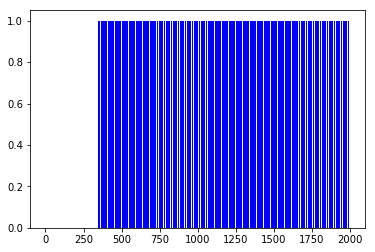

In [9]:
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

And here is the map that updated all the states.

![frozen_lake_3](images/frozen_lake_3.png)

But, we can find a problem. The problem is that the agent's route isn't optimized.

![frozen_lake_finish_1](images/frozen_lake_finish_1.png)

Our route is red line. But, optimized route is green line. Although we got a correct reward of 1, it isn't efficient route. In our case, to learn about the environment and rules of the game, the agent needs to explore by taking random actions even though these actions haven't optimal values.

----
## 3. Optimized Q-table with Exploit and Exploration

Why isn't the first algorithm optimized? Let's see the algorithm again:

$$
\pi^{*}{(s)} = {\operatorname{argmax}}{Q(s, a)}
$$

where $s$ is a state, $a$ is an action, and $\pi$ is a policy, $^{*}$ is meaning of optimization. According to this equation, the agent should move to next state that has the greatest value. So, although other route has more efficient way, the agent always moves in the same way. This is the problem of our first algorithm.

To improve our algorithm, although other state has small value, sometimes the agent should move to there. Let's call this method as **Exploit VS Exploration**. A simple key of this strategy is that sometimes the agent should move randomly. Here is a example in real life. I'm a big fan of Burger King Whopper. And I like McDonald's Big Mac too. But, I don't like KFC and Popeyes. If I express this as a score, here is my preference of food chains.

![junk_food_reward](images/junk_food_reward.png)

Even though I want Big Mac to eat sometimes, according to our first algorithm, I will always go to Burger King. Because Burger King has the greatest preference value. And, I can't find a new delicious hamburger in other food chains. So, I decided to change my strategy. I will go to Burger King in weekdays, because it is my best food chain **(Exploit)**. But I will go to other food chain in weekend to find a new delicious hamburger **(Exploration)**. There are two ways to improve our strategy. 

The first is called an **$\epsilon$-greedy policy**. The main concept of this method is that set a small probability. Let's call this probability $\epsilon$ (epsilon). The agent will choose random action with $\epsilon$ probability. Contrary, it will choose an action from ${Q(s, a)}$ with $1 - \epsilon$ probability.

```
e = 0.1
if rand < e:
    a = random
else:
    a = argmax(Q(s, a))
```

So, I will go to Burger King with a 90% chance. And I will go to other food chains with 10% chance. Like this, the agent will follow ${Q(s, a)}$ with 90% chance. And the agent will find new way with a 10% chance. But, this strategy isn't efficient. Because, as learning progresses, the agent need to find a new way less and less. So, at first, the agent needs to do a lot of exploring. Later when it has learned more, the agent can favor choosing actions based on what it has learned. This is called exploitation. We'll set it up so the agent is more likely to explore early in training, then more likely to exploit later in training. The is called an **decaying $\epsilon$-greedy policy**

```
for i in range(1000):
    e = 0.1 / (i+1)
    
    if random(1) < e:
        a = random
    else:
        a = argmax(Q(s, a)) 
```

Accorind to this, as time passes, $\epsilon$ is decreased. So, later when it has learned more, the agent can choose action based on what it has learned than random action.

And the second is called an **add random noise**. The concept of this method is that just add random value to each action. 

![junk_food_random_value](images/junk_food_random_value.png)

$$
{a} = {\operatorname{argmax}}{Q(s, a) + {RandomValue}}
$$

$$
{a} = {\operatorname{argmax}}{([0.3, 0.9, 0.2, 0.7] + [0.2, 0.1, 0.4, 0.5])}
$$

In this case, we will choose McDonald's. And also we can use dacaying policy with add random noise.

```
for i in range(1000):
    a = argmax(Q(s, a) + random_value / (i+1))
```

Comparing **$\epsilon$-greedy policy** and **add random noise**, when the agent choose random action in $\epsilon$-greedy policy, it is totally random. But same case in add random noise, since the noise_values  are added to the existing $Q(s, a)$ values, it is affected by Q-learning function value even though the agent will choose random action. So, the probability that an action has a high Q-leaning value is selected is higher than $\epsilon$-greedy policy. Let's check our first algorithm again:

* For each $s$, $a$ initialize table entry $\hat{Q}(s, a) \leftarrow 0$. 
* Observe current state $s$
* Do forever:
    * **Select an action $a$ and execute it**
    * Receive immediate reward $r$
    * Observe the new state $s'$
    * Update the table entry for $\hat{Q}(s, a)$ as follows:        
        $\hat{Q}(s, a) \leftarrow r + \max\hat{Q}(s', a')$
    * $s \leftarrow s'$

In this algorithm, we didn't tell how to select an action and execute it. Now, the agent will select an action with **$\epsilon$-greedy policy** or **add random noise**. Now, let's implement the Q-learning with add random noise.

Success rate: 0.902
Final Q-Table Values
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


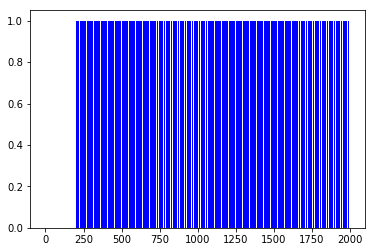

In [12]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1)) #Add random noise.
        #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        #np.random.randn : Return a sample (or samples) from the “standard normal” distribution.

        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        Q[state, action] = reward + np.max(Q[new_state, :]) #Update table with new knowledge using learning rate
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)

    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.   

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

And here is the map that updated all the states.

![frozen_lake_with_EE](images/frozen_lake_with_EE.png)

But, this algorithm has some problems too. If the agent is on $s_{10}$, where should the agent go?

![where_will_you_go](images/where_will_you_go.png)

----
## 4. Optimized Q-table with Discounted reward

So, we need a solution. The problem with our algorithm is that all the reward is 1. There are two reward in this game: present reward and future reward. However, our algorithm doesn't distinguish between them. So, we should update our algorithm to distinguish current reward and future reward. We will give a weight to the present reward. 
Getting immediate reward is better than delayed reward. Here is our new Q-learning equation:

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

where $\gamma$ is weight. In this case, $r$ is present reward and $\max{Q(s', a')}$ is future reward. Because we need reduce future reward, $\gamma$ should be less than 1. Let's update the map again using this formula when $\gamma$ is 0.9.

![discounted_reward_1](images/discounted_reward_1.png)

$s_{15}$ is our goal. So, $Q(s_{14}, a_{right})$ is 1. 

![discounted_reward_2](images/discounted_reward_2.png)

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

$$
Q(s_{13}, a) = 0 + 0.9\cdot{Q(s_{14}, a_{right})} = 0.9
$$

![discounted_reward_3](images/discounted_reward_3.png)

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

$$
Q(s_{9}, a) = 0 + 0.9\cdot{Q(s_{13}, a_{right})} = 0.9\cdot0.9 = 0.81
$$

![discounted_reward_4](images/discounted_reward_4.png)

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

$$
Q(s_{10}, a) = 0 + 0.9\cdot{Q(s_{9}, a_{down})} = 0.9\cdot0.9\cdot0.9 = 0.72
$$

Like this way, we can update $Q(s_{10}, a_{down})$.

![discounted_reward_5](images/discounted_reward_5.png)

$$
Q(s, a) = r + \gamma \max{Q(s', a')}
$$

$$
Q(s_{10}, a) = 0 + 0.9\cdot{Q(s_{14}, a_{right})} = 0.9
$$

Finally, the agent can distinguish optimized route. On $s_{10}$, the agent will choose $a_{down}$.

![discounted_reward_6](images/discounted_reward_6.png)

In conclusion, we can summarize our final algorithm.

* For each $s$, $a$ initialize table entry $\hat{Q}(s, a) \leftarrow 0$. 
* Observe current state $s$
* Do forever:
    * Select an action $a$ and execute it
    * Receive immediate reward $r$
    * Observe the new state $s'$
    * Update the table entry for $\hat{Q}(s, a)$ as follows:        
        $\hat{Q}(s, a) \leftarrow r + \gamma\max\hat{Q}(s', a')$
    * $s \leftarrow s'$

Success rate: 0.9555
Final Q-Table Values
[[ 0.          0.          0.95099005  0.        ]
 [ 0.          0.          0.96059601  0.        ]
 [ 0.          0.970299    0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.99        0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.99        0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


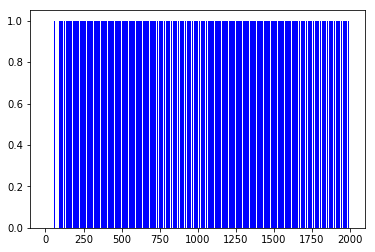

In [13]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

# Discount factor
dis = .99

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1)) #Add random noise.
        #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        #np.random.randn : Return a sample (or samples) from the “standard normal” distribution.

        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        Q[state, action] = reward + dis * np.max(Q[new_state, :]) #Update table with new knowledge using decay rate
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)

    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.   

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

And, here is the reward map.

![dummy](images/dummy.png)

----
## 5. Q-table in real world

Like the name of the game 'Frozenlake', let's think we're on an real frozen lake. The place will be very slippery. So, although we should move carefully, we couldn't move accurately. Fon instance, we tried to move to right, but we could slip down. In previous environment, the agent could move accurately. Because it is artificial environment. But we can set more realistic environment. We call this environment as **Stochastic model**.

* **Deterministic models** : the output of the model is fully determined by the parameter values and the initial conditions initial conditions.
* **Stochastic models** : possess some inherent randomness. The same set of parameter values and initial conditions will lead to an ensemble of different outputs.

In [24]:
register(
    id='FrozenLake-v2',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4',
            'is_slippery': True} #changing is_slippery value.
) #Environment setting

env = gym.make("FrozenLake-v2") #Environment generate


Error: Cannot re-register id: FrozenLake-v4

We can make Stochastic model by changing 'is_slippery' value to True.

In [25]:
for _ in range(3):
    env.render() #Display environment
    action = env.action_space.sample() #The agent action.
    observation, reward, done, info = env.step(action) #Execute step and get infomations

  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG


According to results, The agent doesn't move as we expected. Let's apply our previous algorithm.

Success rate: 0.018
Final Q-Table Values
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


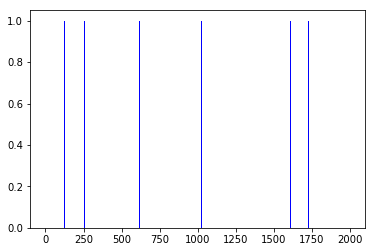

In [26]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

# Discount factor
dis = .99

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1)) #Add random noise.
        #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        #np.random.randn : Return a sample (or samples) from the “standard normal” distribution.

        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        Q[state, action] = reward + dis * np.max(Q[new_state, :]) #Update table with new knowledge using decay rate
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)

    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.   

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

Totally failed. We need new solution. The solution is simple:
> Two heads are better than one

Like our life mentors. Don’t just listen and follow one mentor. we need our own solutions. In previour model, we just accept Q-function completely. So, our new algorithm is that listen to $Q(s')$ just little bit(mentor's solution) and update $Q(s)$ little bit(our own solution). So, we will update $Q(s)$ by learning rate. 

There is our previous equation:

$$
Q(s, a) \leftarrow r + \gamma \max{Q(s', a')}
$$

And Here is a new equation:

$$
Q(s, a) \leftarrow (1-\alpha){Q(s, a)} + \alpha[r + \gamma \max{Q(s', a')}]
$$

$$
Q(s, a) \leftarrow {Q(s, a)} + \alpha[r + \gamma \max{Q(s', a')} - {Q(s, a)}]
$$

where $\alpha$ is learning rate. And, let's update our algorithm.

* For each $s$, $a$ initialize table entry $\hat{Q}(s, a) \leftarrow 0$. 
* Observe current state $s$
* Do forever:
    * Select an action $a$ and execute it
    * Receive immediate reward $r$
    * Observe the new state $s'$
    * Update the table entry for $\hat{Q}(s, a)$ as follows:        
        $Q(s, a) \leftarrow (1-\alpha){Q(s, a)} + \alpha[r + \gamma \max{Q(s', a')}]$
    * $s \leftarrow s'$


Success rate: 0.5285
Final Q-Table Values
[[  3.63002867e-01   4.08257551e-03   3.73545590e-03   1.36662716e-03]
 [  5.54826485e-03   7.09606095e-04   7.15699305e-05   4.86682365e-01]
 [  3.46632231e-01   8.86687841e-05   1.52845523e-03   3.79841329e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  5.69934871e-01   8.82252814e-04   9.92675595e-04   1.16721890e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  1.17954562e-03   2.57846359e-01   3.89733149e-05   4.56718132e-15]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.01625217e-03   5.75088809e-05   0.00000000e+00   7.60906185e-01]
 [  0.00000000e+00   9.22836259e-01   0.00000000e+00   2.54932819e-04]
 [  6.80365390e-01   6.58116684e-04   5.45639233e-04   3.42339866e-04]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   3.26543137e-03

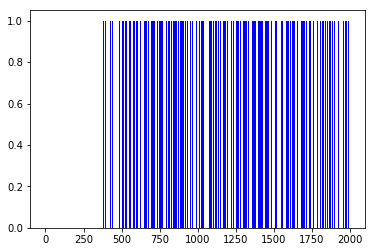

In [28]:
#Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n]) #16, 4(4x4 : each state, [Up, Down, Left, Right])

# Discount factor
dis = .99

#Set learning parameters
num_episodes = 2000 #Repeat 2000 times

#Set learning rate
learning_rate = .85

#create lists to contain total rewards and steps per episode
rList = [] #List for saving result

for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset() #Initialize evironment 
    rAll = 0 #Result. When this value is 0, it means the agent fall in a hole. 
             #And when this value is 1, it means the agent reach the goal.
    done = False 

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1)) #Add random noise.
        #parameter : Q[current state, all of actions(Up, Down, Left, Right)]
        #np.random.randn : Return a sample (or samples) from the “standard normal” distribution.

        new_state, reward, done, _ = env.step(action) #Get new state and reward from environment
        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))
        rAll += reward #Sum up the reward.
        state = new_state #state update (the agent moves to next state)

    #After the game is over. (while loop finished)
    rList.append(rAll) #Append result to the list.   

print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

According to result, after learning, we can see that the agent usually succeeds even though it is in stochastic environment.

----
## 6. Q-Network

We fully understood Q-learning! But think about it. Can we apply this model to real life or more complex environment? Maybe not. In previous environment, we just used 16 states and 4 actions. Even if you simply represent an image of 16 * 16 pixels by RGB, we should prepare $256^{16\cdot16}$ tables. So, we need more universal model: **Neural Network**.

![q_network](images/q_network.png)

Compared with the Q-table, The Q-network receives the state and returns all possible action values. In previous Frozenlake game, Let's apply the Q-network by example state:

$$
Q_{network}(s_{example}, a) = [0.5, 0.1, 0.0, 0.8]
$$

$[0.5, 0.1, 0.0, 0.8]$ represents $(a_{left}, a_{right}, a_{up}, a_{down})$.

![nn](images/nn.png)

In the Neural Network, when we put state into the input, we will receive reward as output.

$$
H(x) = Wx = \hat{Q}(s,a)
$$

where $H$ is hypothesis, $W$ is ouput of the Neural Network. So, we can calculate cost by [Mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error).

$$
cost(W) = \frac{1}{n}\sum_{i=1}^{n} (Wx_i - y_i)^2
$$

where $y$ is taget label. In Q-learning, we don't have any target label because it is reinforcement learning. So, in this case, we will set target label as $Q(s, a)$. Because optimize $Q(s, a)$ is our goal.

$$
cost(W) = \frac{1}{n}\sum_{i=1}^{n} (Wx_i - y_i)^2
$$

$$
cost(W) = (Wx - y)^2
$$

$$
y =  r + \gamma\max{Q(s')}
$$

Let's approximate $Q^*$ function using weight:
$$
\hat{Q}(s, a|\theta) \to {Q}^*(s, a)
$$

where $\theta$ is weight. So, we try to optimize Q-function by using $s$, $a$ and $\theta$. So, we can choose $\theta$ to minimize using this equation:

$$
\min\sum_{t=0}^{T}[\hat{Q}(s_t, a_t|\theta) - (r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\theta))]^2
$$

It looks complicated. But it is just same as optimizing weight in Linear regression by Mean squared error.

Putting all this together, we can list out the algorithm we'll use to train the network.

* Initialize action-value network $Q$ with random weights
* **For** episode = 1, $M$ **do**
    Initialise sequence $s_1$ = {$x_1$} and preprocessed sequence $\phi_1 = \phi(s_1)$ 
  * **For** $t=1$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \max_a Q^*(\phi(s_t), a;\theta)$
     * Execute action $a_t$ in emulator and observe reward $r_t$ and image $x_{t+1}$
     * Set $s_{t+1}$ = $s_t, a_t, x_{t+1}$ and preprocess $\phi_{t+1} = \phi(s_{t+1})$
     * Set$\;{y_j} = \left\{\begin{matrix}& r_{j}\;(for\;terminal\;\phi_{j+1})\\ & r_j + \gamma \max_{a'}{Q(\phi_{j+1}, a';\theta)} \;(for\;non-terminal\;\phi_{j+1})\end{matrix}\right.$
     * Perform a gradient descent step on $(y_j - Q(\phi_j, a_j;\theta))^2$
  * **endfor**
* **endfor**

In [18]:
def one_hot(x):
    return np.identity(16)[x: x+1]
    #np.identity로 one-hot encoding

To make one_hot encoding easier, we can make helper method. [np.identity](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html) will return the identity array.

Percent of successful episodes: 0.5355%


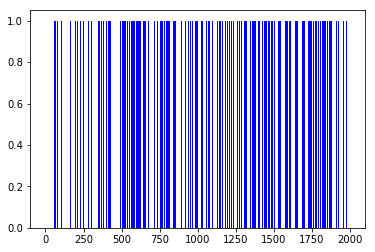

In [29]:
import tensorflow as tf

# Input and output size based on the Env
input_size = env.observation_space.n # 16 (4x4)
output_size = env.action_space.n # 4actions (Up, Down, Left, Right)
learning_rate = 0.1

# These lines establish the feed-forward part of the network used to
# choose actions
X = tf.placeholder(shape=[1, input_size], dtype=tf.float32) # state input
W = tf.Variable(tf.random_uniform([input_size, output_size], 0, 0.01)) # weight

Qpred = tf.matmul(X, W)  # Out Q prediction
Y = tf.placeholder(shape=[1, output_size], dtype=tf.float32) # Y label

loss = tf.reduce_sum(tf.square(Y - Qpred)) 
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

# Set Q-learning related parameters
dis = .99
num_episodes = 2000

# Create lists to contain total rewards and steps per episode
rList = []
init = tf.global_variables_initializer() #tf initialize

with tf.Session() as sess:
    sess.run(init)
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        e = 1. / ((i / 50) + 10)
        rAll = 0
        done = False
        local_loss = []

        # The Q-Network training
        while not done:
            # Choose an action by greedily (with e chance of random action)
            # from the Q-network
            Qs = sess.run(Qpred, feed_dict={X: one_hot(s)})
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)

            # Get new state and reward from environment
            s1, reward, done, _ = env.step(a) 
            if done:
                # Update Q, and no Qs+1, since it's a terminal state
                Qs[0, a] = reward #When the agent got a reward, update Q
            else:
                # Obtain the Q_s1 values by feeding the new state through our
                # network
                Qs1 = sess.run(Qpred, feed_dict={X: one_hot(s1)}) #Continue learning
                # Update Q
                Qs[0, a] = reward + dis * np.max(Qs1)

            # Train our network using target (Y) and predicted Q (Qpred) values
            sess.run(train, feed_dict={X: one_hot(s), Y: Qs})

            rAll += reward
            s = s1 #move to next state
        rList.append(rAll)

print("Percent of successful episodes: " +
      str(sum(rList) / num_episodes) + "%")
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

But actually this model isn't efficient. In other words, it has some problem. How can we fix it? The solution is **DQN**. But, before we update our model with DQN, let's look at other game using same model. The other game is **CartPole**. In this game, a freely swinging pole is attached to a cart. The cart can move to the left and right, and the goal is to keep the pole upright as long as possible.

![cart_pole](images/cart_pole.png)

In [4]:
env = gym.make('CartPole-v0') #Load CartPole environment
env.reset()
random_episodes = 0
reward_sum = 0

[2017-08-06 22:36:24,941] Making new env: CartPole-v0


We interact with the simulation through env. To show the simulation running, you can use env.render() to render one frame. Passing in an action as an integer to env.step will generate the next step in the simulation. You can see how many actions are possible from env.action_space and to get a random action you can use env.action_space.sample(). This is general to all Gym games. In the Cart-Pole game, there are two possible actions, moving the cart left or right. So there are two actions we can take, encoded as 0 and 1.

Run the code below to watch the simulation run.

In [10]:
rewards = []

for _ in range(100):
    env.render()
    state, reward, done, info = env.step(env.action_space.sample()) #Take a random action
    rewards.append(reward)
    reward_sum += reward
    
    if done:
        random_episodes += 1
        rewards = []
        print("Reward for this episode {} was: {}".format(random_episodes, reward_sum))
        reward_sum = 0
        env.reset()
        
env.close()

Reward for this episode 1 was:20.0
Reward for this episode 2 was:18.0
Reward for this episode 3 was:16.0
Reward for this episode 4 was:19.0
Reward for this episode 5 was:17.0


To shut the window showing the simulation, use env.close().

If you ran the simulation above, we can look at the rewards:

In [11]:
print(rewards[-20:])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


The game resets after the pole has fallen past a certain angle. For each frame while the simulation is running, it returns a reward of 1.0. The longer the game runs, the more reward we get. Then, our network's goal is to maximize the reward by keeping the pole vertical. It will do this by moving the cart to the left and the right. So, let's make network.

In [6]:
from collections import deque

# Constants defining our neural network
learning_rate = 1e-1
input_size = env.observation_space.shape[0] #4
output_size = env.action_space.n #2

X = tf.placeholder(tf.float32, [None, input_size], name="input_x")

# First layer of weights
W1 = tf.get_variable("W1", shape=[input_size, output_size], initializer=tf.contrib.layers.xavier_initializer())
Qpred = tf.matmul(X, W1)

# We need to define the parts of the network needed for learning a policy
Y = tf.placeholder(shape=[None, output_size], dtype=tf.float32)

# Loss function
loss = tf.reduce_sum(tf.square(Y - Qpred))
# Learning
train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

ValueError: Variable W1 already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-5-3bbf03a0a27c>", line 11, in <module>
    W1 = tf.get_variable("W1", shape=[input_size, output_size], initializer=tf.contrib.layers.xavier_initializer())
  File "/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):


It's very simillar with previous 'FrozenLake' environment. Like this, we can make network by Q-network. If there are differences, we will receive left or right as Q-reward. In 'FrozenLake' environment, we received up, down, left and right as Q-reward.

In [ ]:
# Values for q learning
max_episodes = 5000
dis = 0.9
step_history = []

# Setting up our environment
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for episode in range(max_episodes):
    e = 1. / ((episode / 10) + 1)
    step_count = 0
    state = env.reset()
    done = False

    # The Q-Network training
    while not done:
        step_count += 1
        x = np.reshape(state, [1, input_size])
        # Choose an action by greedily (with e chance of random action) from
        # the Q-network
        Q = sess.run(Qpred, feed_dict={X: x})
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q)

        # Get new state and reward from environment
        next_state, reward, done, _ = env.step(action)
        if done:
            Q[0, action] = -100
            #If the pole has fallen, the agent will get negative reward and the game will be over.
            #We set negative 100 reward in this situation.
        else:
            x_next = np.reshape(next_state, [1, input_size])
            # Obtain the Q' values by feeding the new state through our network
            Q_next = sess.run(Qpred, feed_dict={X: x_next})
            Q[0, action] = reward + dis * np.max(Q_next)

        # Train our network using target and predicted Q values on each episode
        sess.run(train, feed_dict={X: x, Y: Q}) #We put optimized Q as target label at current state
        state = next_state

    step_history.append(step_count)
    print("Episode: {}  steps: {}".format(episode, step_count))
    # If last 10's avg steps are 500, it's good enough
    if len(step_history) > 10 and np.mean(step_history[-10:]) > 500:
        break

Let's see the code after env.step()

    if done:
            Q[0, action] = -100
        else:
            x_next = np.reshape(next_state, [1, input_size])
            Q_next = sess.run(Qpred, feed_dict={X: x_next})
            Q[0, action] = reward + dis * np.max(Q_next)

It follows our algorithm:

$$
Set\;{y_i} = 
\left\{\begin{matrix}
& r_{j}\;(for\;terminal)\\ 
& r_{j} + \gamma\max{Q} \;(for\;non-terminal)
\end{matrix}\right.
$$

If the pole has fallen, the agent will get negative reward and the episode will be over. So, we set negative 100 reward(big penalty) in this situation. By doing this, the agent will be train.

    if len(step_history) > 10 and np.mean(step_history[-10:]) > 500:
        break

If the pole doesn't have fall over 500 steps, we will consider that the agent is learned.

After training, we can use our model as test model.

In [1]:
# See our trained network in action
observation = env.reset()
reward_sum = 0
while True:
    env.render()

    x = np.reshape(observation, [1, input_size])
    Q = sess.run(Qpred, feed_dict={X: x})
    action = np.argmax(Q)

    observation, reward, done, _ = env.step(action)
    reward_sum += reward
    if done:
        print("Total score: {}".format(reward_sum))
        break

env.close()

NameError: name 'env' is not defined

But, our network doesn't work well. Because our model has some problems. But, how can we fix our model? The answer is that: use **Deep Q-Network**. Finally, it is time to implement DQN. 

----
## 7. Deep Q-network

Our model has three main problems:

* Too shallow
* Correlations between samples
* Non-stationary targets
    
First, we use only one layer. It isn't deep enough to make a good solution.

And second, it has problem that **Correlations between samples**. According to algorithm, each data that we received is very simmilar. Because when we received reward, the pole state isn't significantly different from previous state. So, there are correlations between samples. But, why is it a problem? 

![DQN_linear_1.png](images/DQN_linear_1.png)

This is a graph of weight and mile per gallon about a car. And we can draw a blue line as a result of linear regression. But if we had only a few correlational data like in the black circle, we would draw different line as a red. It makes totally different result. Our previous model has same problem. The agent could be trained incorrectly because it was just trained by correlational samples. 

Third problem is **Non-stationary targets**. Let's check our cost formula again.

$$
\min\sum_{t=0}^{T}[\hat{Q}(s_t, a_t|\theta) - (r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\theta))]^2
$$

In this equation, $\min\sum_{t=0}^{T} \hat{Q}(s_t, a_t|\theta)$ is our prediction. And $(r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\theta))^2$ is our target.

$$
\hat{Y} = \hat{Q}(s_t, a_t|\theta)
$$

$$
Y = (r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\theta)
$$

So, our goal is making $\hat{Y}$ and $Y$ similar. But, we have same $\theta$ in each equation. When we update our $\hat{Y}$, our target $Y$ is updated too. It is like that immediately moving a target after shooting an arrow. 
This is an ironical situation. So, we call this situation **Non-stationary targets**.

So, we have solutions:
* Too shallow
    * Go deep
* Correlations between samples
    * Capture and replay
* Non-stationary targets
    * Separate networks: Create a target network

And we call this solution network **Deep Q-network**. And let's dive into DQN's solutions.

First, **Go deep**. Actually our previous network isn't deeper enough. So, we should make our network deeper as making more layers. 

![Deep Q-Learning Atari](images/atari-network.png)

Second, **Capture and replay**. This is solution of Correlations between samples problem. This concept is very simple. To prevent Correlations between samples, we save data in buffer after the agent's action. Then choose random sample in the buffer and update by algorithm.

![capture_and_replay](images/capture_and_replay.png)

Let's see the graph of weight and mile per gallon about a car again.

![DQN_linear_2](images/DQN_linear_2.png)

In this graph, circles are same as previous scatter graph. And blue line is linear regression line by circles. However I choose half of previous samples ramdomly, and mark as 'x'. And red line is linear regression line by 'x's. As you can see, each result are almost same. Like this, we can train our Q-network by choosing random samples in buffer.

So, we can summarize that:

* Initialize action-value network $Q$ with random weights
* **For** episode = 1, $M$ **do**
    Initialise sequence $s_1$ = {$x_1$} and preprocessed sequence $\phi_1 = \phi(s_1)$ 
  * **For** $t=1$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \max_a Q^*(\phi(s_t), a;\theta)$
     * Execute action $a_t$ in emulator and observe reward $r_t$ and image $x_{t+1}$
     * Set $s_{t+1}$ = $s_t, a_t, x_{t+1}$ and preprocess $\phi_{t+1} = \phi(s_{t+1})$
     * **Store transition $(\phi_t, a_t, r_t, \phi_{t+1})$ in $D$**
     * **Sample random minibatch of transition $(\phi_j, a_j, r_j, \phi_{j+1})$ from $D$**
     * Set$\;{y_j} = \left\{\begin{matrix}& r_{j}\;(for\;terminal\;\phi_{j+1})\\ & r_j + \gamma \max_{a'}{Q(\phi_{j+1}, a';\theta)} \;(for\;non-terminal\;\phi_{j+1})\end{matrix}\right.$
     * Perform a gradient descent step on $(y_j - Q(\phi_j, a_j;\theta))^2$
  * **endfor**
* **endfor**

Third, **Separate networks: Create a target network**. This is solution of Non-stationary targets problem. It is really simple. Just create two network. Let's update our equation.

$$
\min\sum_{t=0}^{T}[\hat{Q}(s_t, a_t|\theta) - (r_t + \gamma\max\hat{Q}(s_{t+1}, a'|\bar\theta))]^2
$$

Only one difference is $\bar\theta$ in target label. We will separate network as training and target. First of all, we will update only training network. And after several times, update target network too. In our algorithm, this solution corresponds to

* Set $\hat{Q}_j = r_j$ if the episode ends at $j+1$, otherwise set $\hat{Q}_j = r_j + \gamma \max_{a'}{Q(s'_j, a')}$

We will update $\hat{Q}_j = r_j + \gamma \max_{a'}{Q(s'_j, a')}$ by another network.

Finally, we can summarize our algorithm as DQN:

* Initialize replay memory $D$ to capacity $N$
* Initialize action-value network $Q$ with random weights $\theta$
* Initialize target action-value network $\hat{Q}$ with random weights $\bar\theta = \theta$
* **For** episode = 1, $M$ **do**
    Initialise sequence $s_1$ = {$x_1$} and preprocessed sequence $\phi_1 = \phi(s_1)$ 
  * **For** $t=1$, $T$ **do**
     * With probability $\epsilon$ select a random action $a_t$, otherwise select $a_t = \max_a Q^*(\phi(s_t), a;\theta)$
     * Execute action $a_t$ in emulator and observe reward $r_t$ and image $x_{t+1}$
     * Set $s_{t+1}$ = $s_t, a_t, x_{t+1}$ and preprocess $\phi_{t+1} = \phi(s_{t+1})$
     * Store transition $(\phi_t, a_t, r_t, \phi_{t+1})$ in $D$
     * Sample random minibatch of transition $(\phi_j, a_j, r_j, \phi_{j+1})$ from $D$
     * Set$\;{y_j} = \left\{\begin{matrix}& r_{j}\;(if\;episode\;teminates\;at\;step\;{j+1})\\ & r_j + \gamma \max_{a'}{\hat{Q}(\phi_{j+1}, a';\bar\theta)} \;(otherwise)\end{matrix}\right.$
     * Perform a gradient descent step on $(y_j - Q(\phi_j, a_j;\theta))^2$ with respect to the network $\theta$
     * Every $C$ steps reset $\hat{Q} = Q$
  * **endfor**
* **endfor**

In [2]:
import gym
import tensorflow as tf
import numpy as np

In [3]:
class DQN:

    def __init__(self, session: tf.Session, input_size: int, output_size: int, name: str="main") -> None:
        """DQN Agent can
        1) Build network
        2) Predict Q_value given state
        3) Train parameters
        Args:
            session (tf.Session): Tensorflow session
            input_size (int): Input dimension
            output_size (int): Number of discrete actions
            name (str, optional): TF Graph will be built under this name scope
        """
        self.session = session
        self.input_size = input_size
        self.output_size = output_size
        self.net_name = name

        self._build_network()

    def _build_network(self, h_size=16, l_rate=0.001) -> None:
        """DQN Network architecture (simple MLP)
        Args:
            h_size (int, optional): Hidden layer dimension
            l_rate (float, optional): Learning rate
        """
        with tf.variable_scope(self.net_name):
            self._X = tf.placeholder(tf.float32, [None, self.input_size], name="input_x")
            net = self._X

            net = tf.layers.dense(net, h_size, activation=tf.nn.relu)
            net = tf.layers.dense(net, self.output_size)
            self._Qpred = net

            self._Y = tf.placeholder(tf.float32, shape=[None, self.output_size])
            self._loss = tf.losses.mean_squared_error(self._Y, self._Qpred)

            optimizer = tf.train.AdamOptimizer(learning_rate=l_rate)
            self._train = optimizer.minimize(self._loss)

    def predict(self, state: np.ndarray) -> np.ndarray:
        """Returns Q(s, a)
        Args:
            state (np.ndarray): State array, shape (n, input_dim)
        Returns:
            np.ndarray: Q value array, shape (n, output_dim)
        """
        x = np.reshape(state, [-1, self.input_size])
        return self.session.run(self._Qpred, feed_dict={self._X: x})

    def update(self, x_stack: np.ndarray, y_stack: np.ndarray) -> list:
        """Performs updates on given X and y and returns a result
        Args:
            x_stack (np.ndarray): State array, shape (n, input_dim)
            y_stack (np.ndarray): Target Q array, shape (n, output_dim)
        Returns:
            list: First element is loss, second element is a result from train step
        """
        feed = {
            self._X: x_stack,
            self._Y: y_stack
        }
        return self.session.run([self._loss, self._train], feed)

In [7]:
import numpy as np
import tensorflow as tf
import random
from collections import deque

import gym
from typing import List

env = gym.make('CartPole-v0')
env = gym.wrappers.Monitor(env, directory="gym-results/", force=True)

# Constants defining our neural network
INPUT_SIZE = env.observation_space.shape[0]
OUTPUT_SIZE = env.action_space.n

DISCOUNT_RATE = 0.99
REPLAY_MEMORY = 50000
BATCH_SIZE = 64
TARGET_UPDATE_FREQUENCY = 5
MAX_EPISODES = 5000


def replay_train(mainDQN: DQN, targetDQN: DQN, train_batch: list) -> float:
    """Trains `mainDQN` with target Q values given by `targetDQN`
    Args:
        mainDQN (dqn.DQN): Main DQN that will be trained
        targetDQN (dqn.DQN): Target DQN that will predict Q_target
        train_batch (list): Minibatch of replay memory
            Each element is (s, a, r, s', done)
            [(state, action, reward, next_state, done), ...]
    Returns:
        float: After updating `mainDQN`, it returns a `loss`
    """
    states = np.vstack([x[0] for x in train_batch])
    actions = np.array([x[1] for x in train_batch])
    rewards = np.array([x[2] for x in train_batch])
    next_states = np.vstack([x[3] for x in train_batch])
    done = np.array([x[4] for x in train_batch])

    X = states

    Q_target = rewards + DISCOUNT_RATE * np.max(targetDQN.predict(next_states), axis=1) * ~done

    y = mainDQN.predict(states)
    y[np.arange(len(X)), actions] = Q_target

    # Train our network using target and predicted Q values on each episode
    return mainDQN.update(X, y)


def get_copy_var_ops(*, dest_scope_name: str, src_scope_name: str) -> List[tf.Operation]:
    """Creates TF operations that copy weights from `src_scope` to `dest_scope`
    Args:
        dest_scope_name (str): Destination weights (copy to)
        src_scope_name (str): Source weight (copy from)
    Returns:
        List[tf.Operation]: Update operations are created and returned
    """
    # Copy variables src_scope to dest_scope
    op_holder = []

    src_vars = tf.get_collection(
        tf.GraphKeys.TRAINABLE_VARIABLES, scope=src_scope_name)
    dest_vars = tf.get_collection(
        tf.GraphKeys.TRAINABLE_VARIABLES, scope=dest_scope_name)

    for src_var, dest_var in zip(src_vars, dest_vars):
        op_holder.append(dest_var.assign(src_var.value()))

    return op_holder


def bot_play(mainDQN: DQN, env: gym.Env) -> None:
    """Test runs with rendering and prints the total score
    Args:
        mainDQN (dqn.DQN): DQN agent to run a test
        env (gym.Env): Gym Environment
    """
    state = env.reset()
    reward_sum = 0

    while True:

        env.render()
        action = np.argmax(mainDQN.predict(state))
        state, reward, done, _ = env.step(action)
        reward_sum += reward

        if done:
            print("Total score: {}".format(reward_sum))
            break


def main():
    # store the previous observations in replay memory
    replay_buffer = deque(maxlen=REPLAY_MEMORY)

    last_100_game_reward = deque(maxlen=100)

    with tf.Session() as sess:
        mainDQN = dqn.DQN(sess, INPUT_SIZE, OUTPUT_SIZE, name="main")
        targetDQN = dqn.DQN(sess, INPUT_SIZE, OUTPUT_SIZE, name="target")
        sess.run(tf.global_variables_initializer())

        # initial copy q_net -> target_net
        copy_ops = get_copy_var_ops(dest_scope_name="target",
                                    src_scope_name="main")
        sess.run(copy_ops)

        for episode in range(MAX_EPISODES):
            e = 1. / ((episode / 10) + 1)
            done = False
            step_count = 0
            state = env.reset()

            while not done:
                if np.random.rand() < e:
                    action = env.action_space.sample()
                else:
                    # Choose an action by greedily from the Q-network
                    action = np.argmax(mainDQN.predict(state))

                # Get new state and reward from environment
                next_state, reward, done, _ = env.step(action)

                if done:  # Penalty
                    reward = -1

                # Save the experience to our buffer
                replay_buffer.append((state, action, reward, next_state, done))

                if len(replay_buffer) > BATCH_SIZE:
                    minibatch = random.sample(replay_buffer, BATCH_SIZE)
                    loss, _ = replay_train(mainDQN, targetDQN, minibatch)

                if step_count % TARGET_UPDATE_FREQUENCY == 0:
                    sess.run(copy_ops)

                state = next_state
                step_count += 1

            print("Episode: {}  steps: {}".format(episode, step_count))

            # CartPole-v0 Game Clear Checking Logic
            last_100_game_reward.append(step_count)

            if len(last_100_game_reward) == last_100_game_reward.maxlen:
                avg_reward = np.mean(last_100_game_reward)

                if avg_reward > 199:
                    print(f"Game Cleared in {episode} episodes with avg reward {avg_reward}")
                    break

[2017-08-09 17:55:14,015] Making new env: CartPole-v0
[2017-08-09 17:55:14,022] Finished writing results. You can upload them to the scoreboard via gym.upload('/Users/geunseong-gai/Documents/Python/Udacity/MLND/capstone/gym-results')
[2017-08-09 17:55:14,024] Clearing 2 monitor files from previous run (because force=True was provided)
